# Exploring the different regridded versions of the GCM data

## Load some import constants

In [1]:
%load_ext autoreload

%autoreload 2

import xarray as xr
import cftime

from helpers import plot_with_ts, load_dataset

## Load the different datasets

In [2]:
# #orig_gcm_data = xr.open_mfdataset("../../../../data/60km/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
# london_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-london/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
# london_cpm_data = xr.open_mfdataset("../../../../derived_data/2.2km-london/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))

# london_regridded_nn_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-regrid-2.2km-nn-london/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
# london_regridded_lin_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-regrid-2.2km-lin-london/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))

# gcm_data = xr.open_mfdataset("../../../../derived_data/60km/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30"))
# # the data on the CPM grids can get a bit suspect at the edges - for CPM data due to boundary issues, for regridded due to mismatching grid edges means particularly linear regridded can go a bit haywire (e.g. assuming values will continue to increase or decrease)
# cpm_data = xr.open_mfdataset("../../../../data/2.2km/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30")).isel(grid_longitude=slice(30,-30), grid_latitude=slice(30,-30))
# regridded_nn_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-regrid-2.2km-nn/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30")).isel(grid_longitude=slice(30,-30), grid_latitude=slice(30,-30))
# regridded_lin_gcm_data = xr.open_mfdataset("../../../../derived_data/60km-regrid-2.2km-lin/rcp85/01/pr/day/*.nc").isel(ensemble_member=0).sel(time=slice("1980-12-01","1982-11-30")).isel(grid_longitude=slice(30,-30), grid_latitude=slice(30,-30))


london_gcm_data = load_dataset('60km-london', source_model='gcm', variable='pr', years=[1980, 1981]).isel(ensemble_member=0)
london_cpm_data = load_dataset('2.2km-london', source_model='cpm', variable='pr', years=[1980, 1981]).isel(ensemble_member=0)

london_regridded_nn_gcm_data = load_dataset('60km-regrid-2.2km-nn-london', source_model='gcm', variable='pr', years=[1980, 1981]).isel(ensemble_member=0)
london_regridded_lin_gcm_data = load_dataset('60km-regrid-2.2km-lin-london', source_model='gcm', variable='pr', years=[1980, 1981]).isel(ensemble_member=0)

gcm_data = load_dataset('60km', source_model='gcm', variable='pr', years=[1980, 1981]).isel(ensemble_member=0)
# the data on the CPM grids can get a bit suspect at the edges - for CPM data due to boundary issues, for regridded due to mismatching grid edges means particularly linear regridded can go a bit haywire (e.g. assuming values will continue to increase or decrease)
cpm_data = load_dataset('2.2km', source_model='cpm', variable='pr', years=[1980, 1981]).isel(ensemble_member=0).isel(grid_longitude=slice(30,-30), grid_latitude=slice(30,-30))


# View rainfall on same days in different versions of data in London

The raw GCM precip, the GCM precip regrided to match CPM grid according to NN and linear schemes, and the raw CPM precip in London (with zoomed out versions of whole of UK for GCM and CPM to check)

In [3]:
# find the wettest days (in London) for each of the datasets
five_wettest_gcm_days = london_gcm_data.sum(dim=["projection_x_coordinate", "projection_y_coordinate"]).sortby('pr').time[-5:]
five_wettest_regridded_nn_gcm_days = london_regridded_nn_gcm_data.sum(dim=["grid_latitude", "grid_longitude"]).sortby('pr').time[-5:]
five_wettest_regridded_lin_gcm_days = london_regridded_lin_gcm_data.sum(dim=["grid_latitude", "grid_longitude"]).sortby('pr').time[-5:]
five_wettest_cpm_days = london_cpm_data.sum(dim=["grid_latitude", "grid_longitude"]).sortby('pr').time[-5:]

In [4]:
five_wettest_gcm_days.values

array([cftime.Datetime360Day(1981, 4, 4, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 20, 12, 0, 0, 0),
       cftime.Datetime360Day(1980, 12, 19, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 13, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 3, 12, 0, 0, 0)], dtype=object)

In [5]:
five_wettest_regridded_nn_gcm_days.values

array([cftime.Datetime360Day(1981, 4, 4, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 20, 12, 0, 0, 0),
       cftime.Datetime360Day(1980, 12, 19, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 13, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 3, 12, 0, 0, 0)], dtype=object)

In [6]:
five_wettest_regridded_lin_gcm_days.values

array([cftime.Datetime360Day(1981, 4, 4, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 20, 12, 0, 0, 0),
       cftime.Datetime360Day(1980, 12, 19, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 13, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 3, 12, 0, 0, 0)], dtype=object)

In [7]:
five_wettest_cpm_days.values

array([cftime.Datetime360Day(1982, 6, 24, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 3, 23, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 6, 6, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 1, 26, 12, 0, 0, 0),
       cftime.Datetime360Day(1981, 11, 20, 12, 0, 0, 0)], dtype=object)

## Wettest days according to GCM

Compare plots of precip on 5 wettest days in London boxes according to GCM

Notice how in say 4th row GCM and CPM disagree on which is the wettest quadrant.

/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


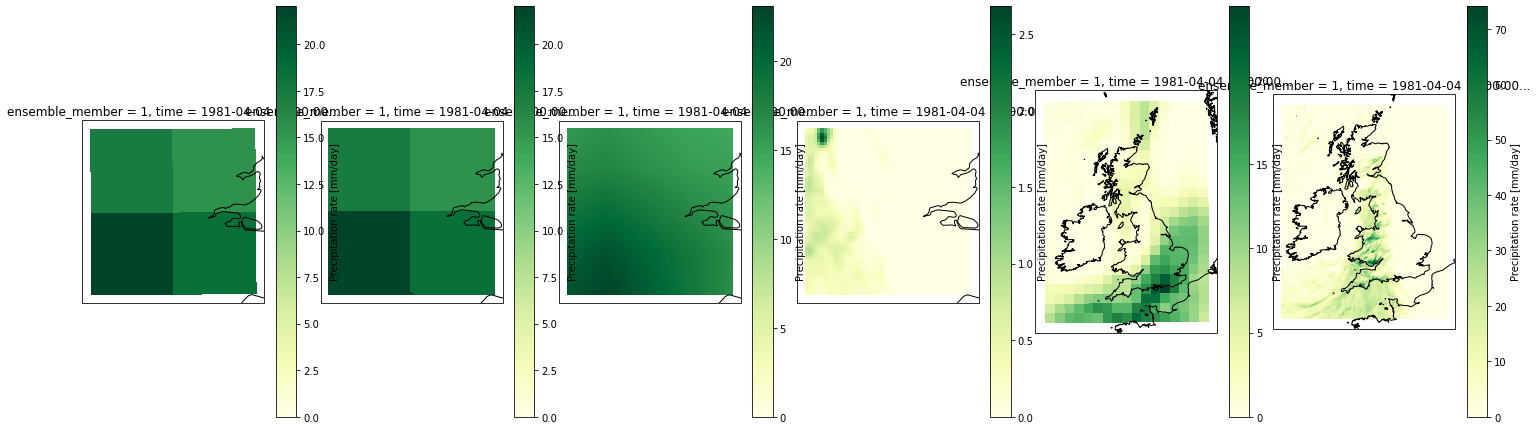

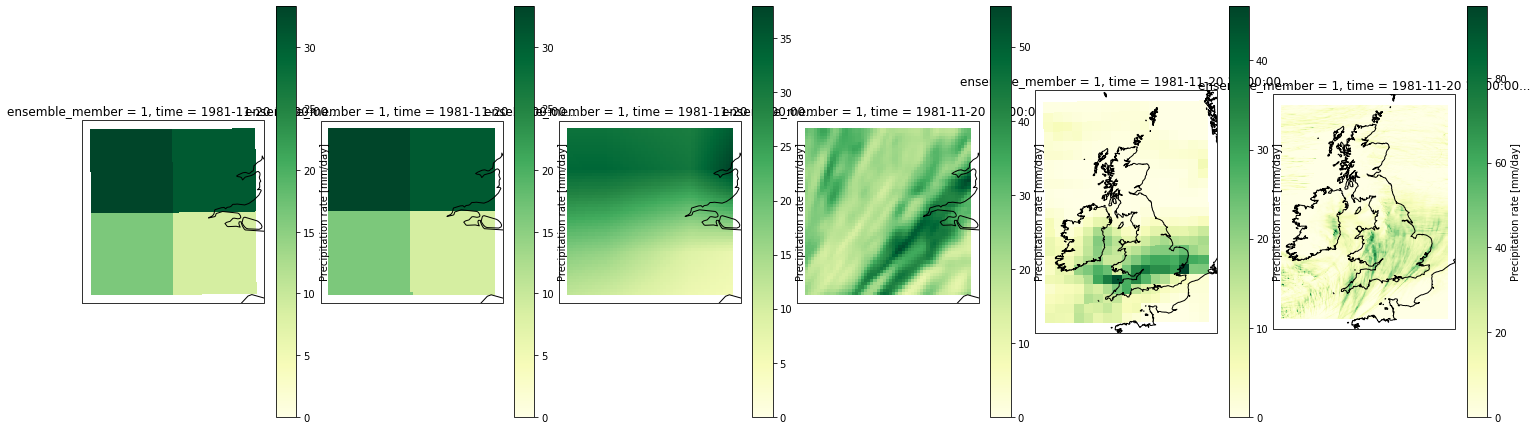

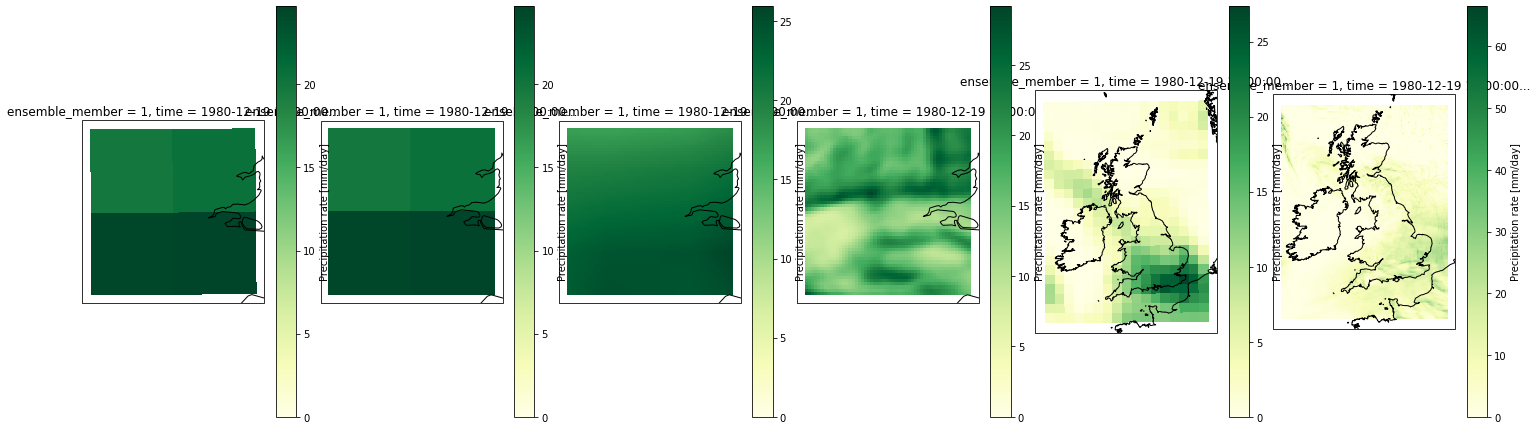

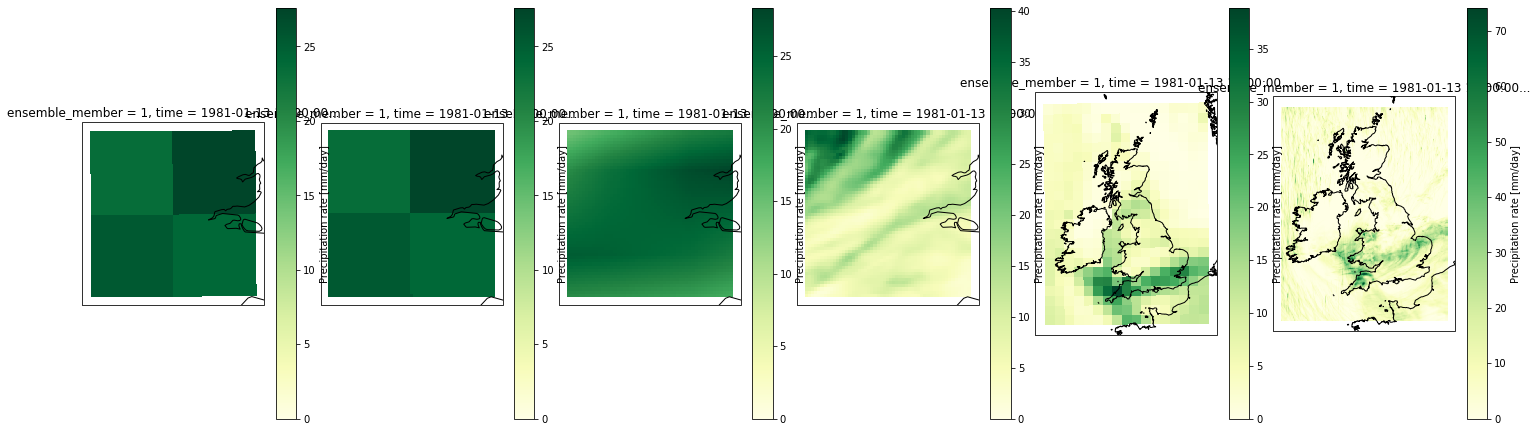

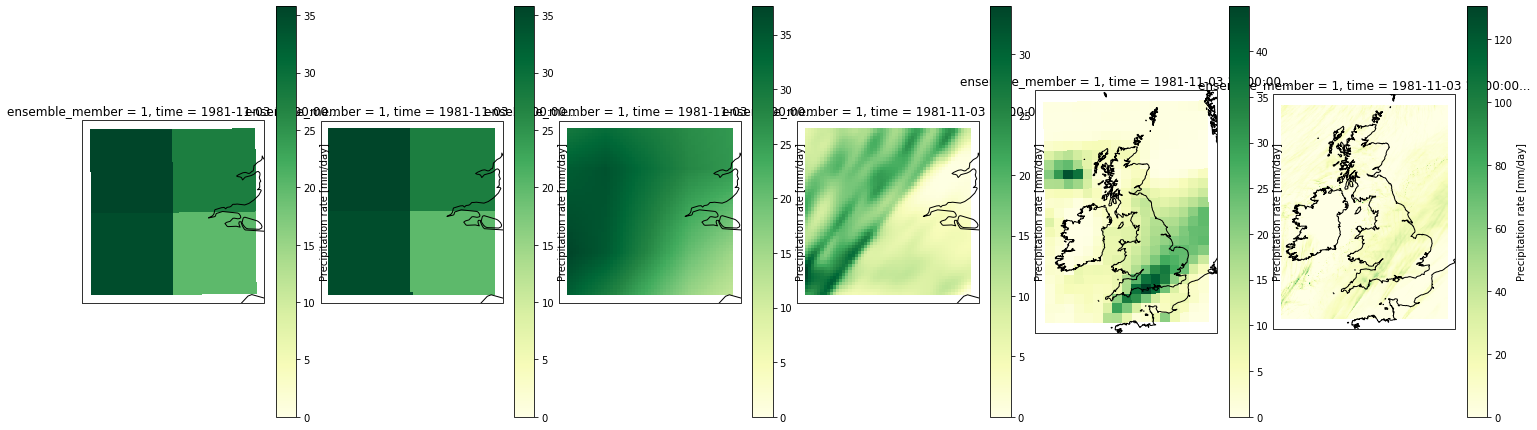

In [8]:
plot_with_ts([london_gcm_data, london_regridded_nn_gcm_data, london_regridded_lin_gcm_data, london_cpm_data, gcm_data, cpm_data], five_wettest_gcm_days)

## Wettest days according to CPM

Compare plots of precip on 5 wettest days in London boxes according to CPM

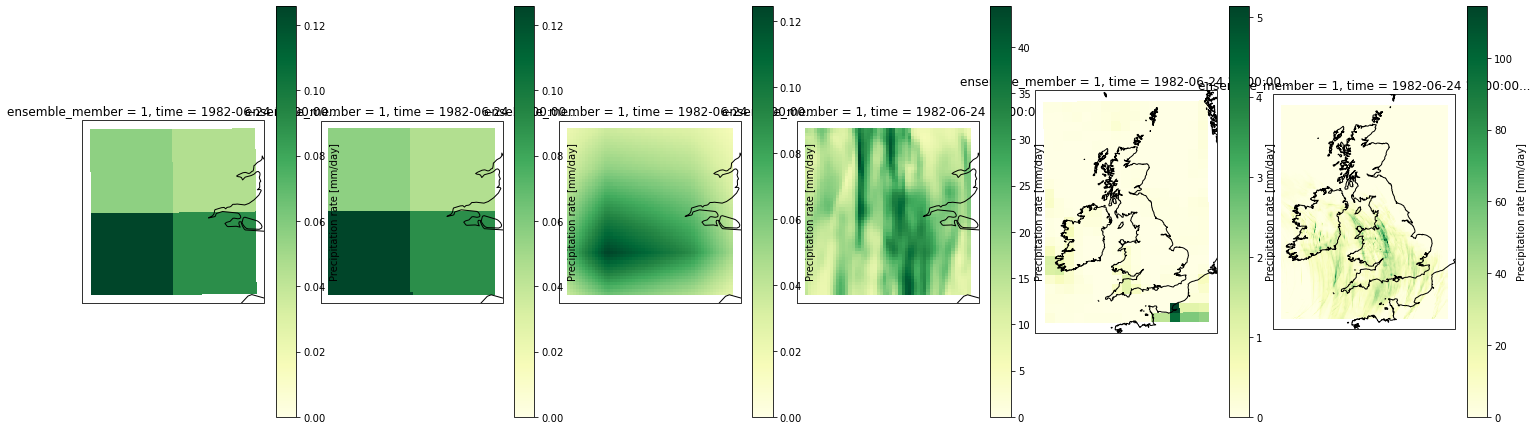

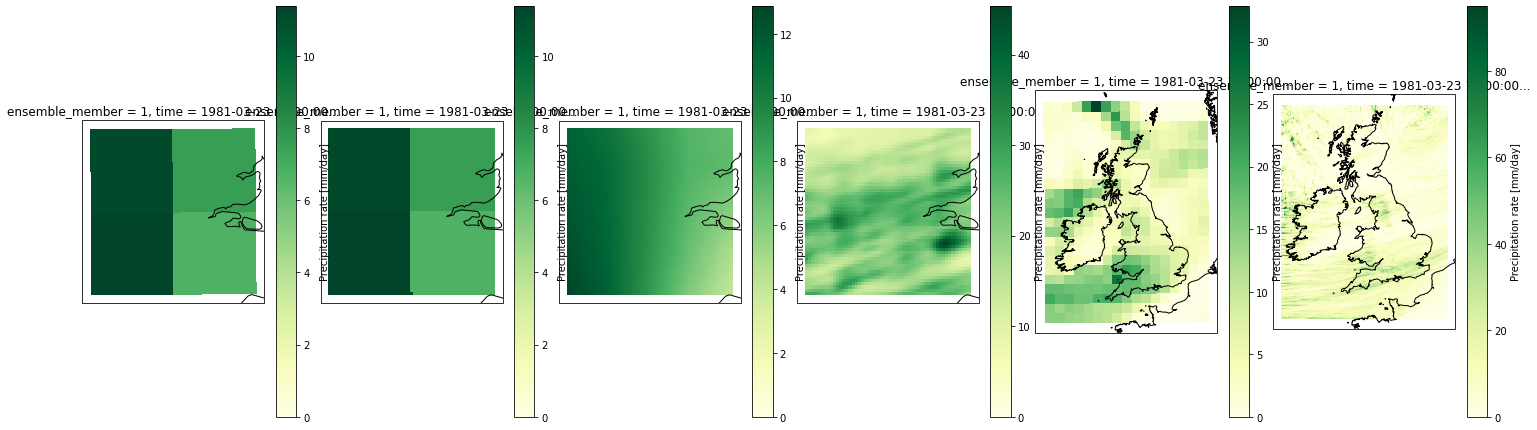

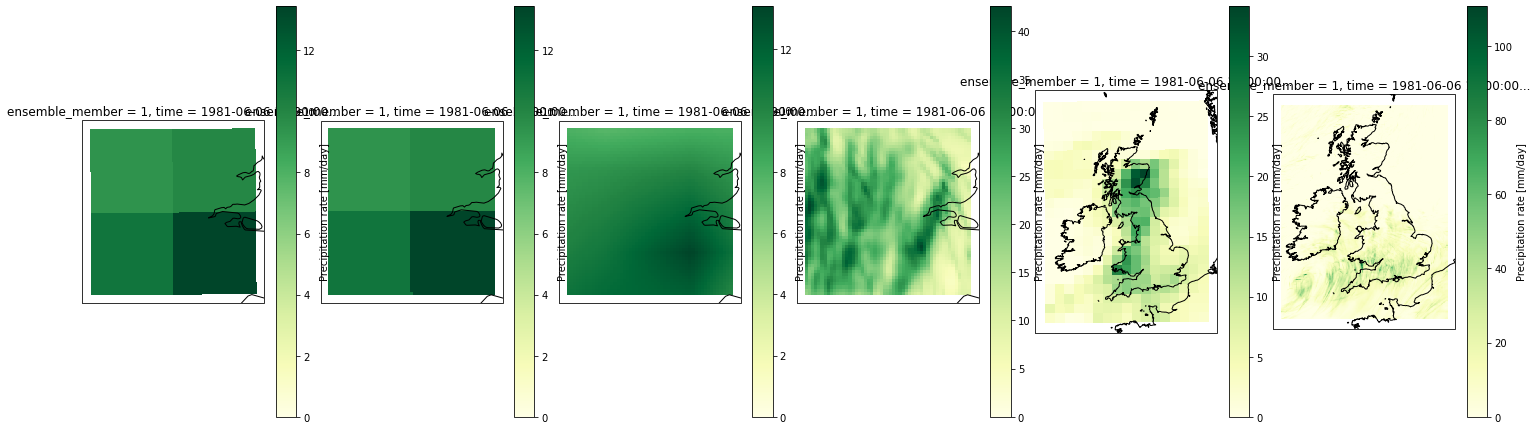

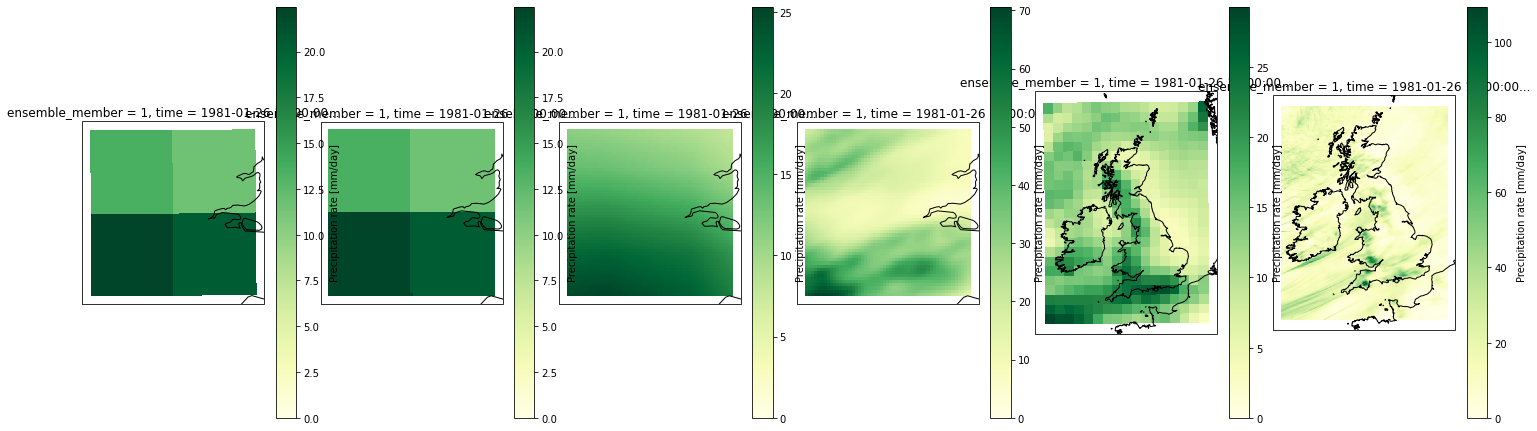

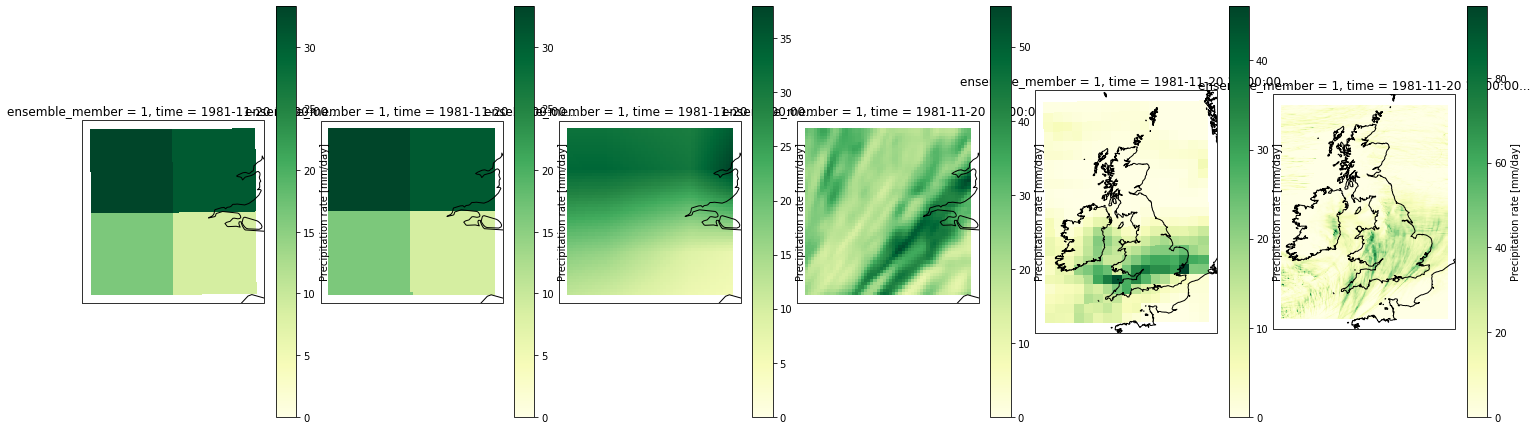

In [9]:
plot_with_ts([london_gcm_data, london_regridded_nn_gcm_data, london_regridded_lin_gcm_data, london_cpm_data, gcm_data, cpm_data], five_wettest_cpm_days)

## Median of wet days according to GCM

Compare plots of precip on 5 days around the median of total rainfall in London boxes (after very dry day are removed, very dry means < 0.4)

Notice how in say 4th row GCM and CPM disagree on which is the wettest quadrant

In [10]:
london_total_pr = london_gcm_data.sum(dim=["projection_x_coordinate", "projection_y_coordinate"])
london_wet_day_total_pr = london_total_pr.where(london_total_pr.pr > 0.4, drop=True).sortby('pr')
median_idx = len(london_wet_day_total_pr.time)//2
print(median_idx)
london_median_wet_days = london_wet_day_total_pr.time[median_idx-3:median_idx+3]

236


/home/henry/anaconda3/envs/downscaling/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


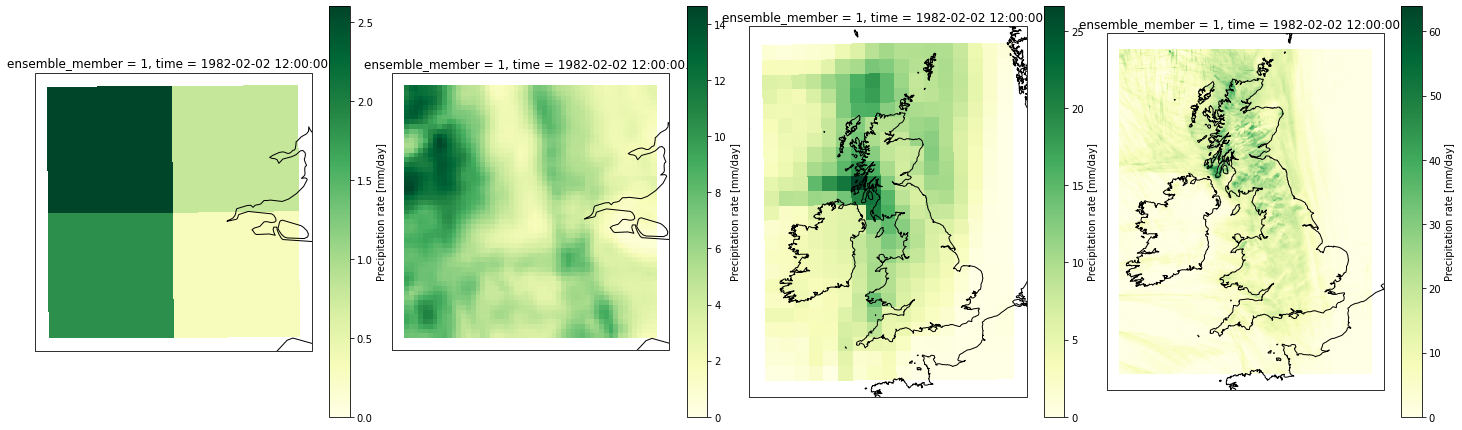

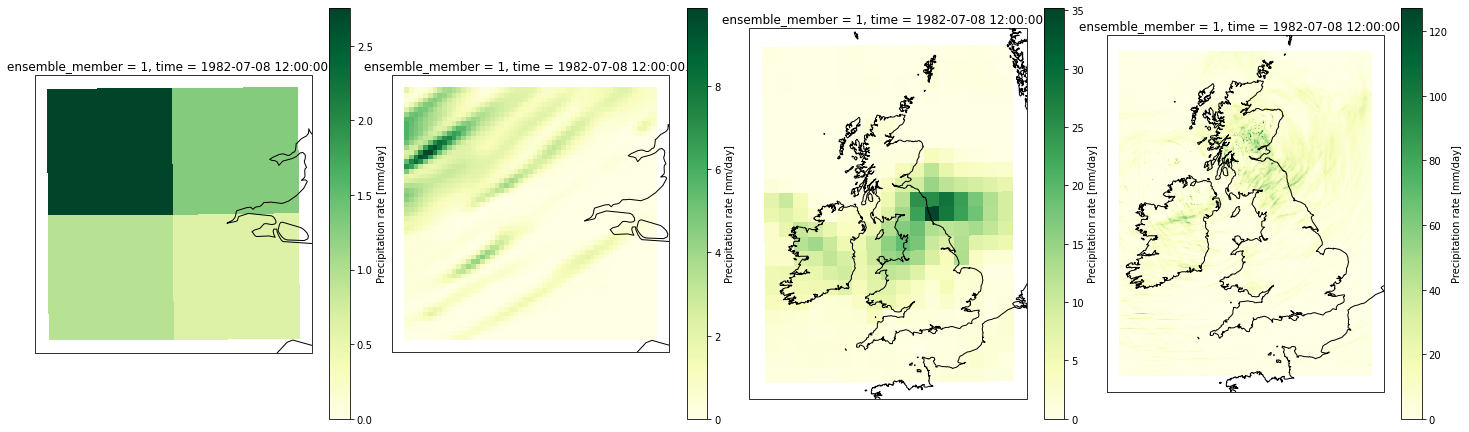

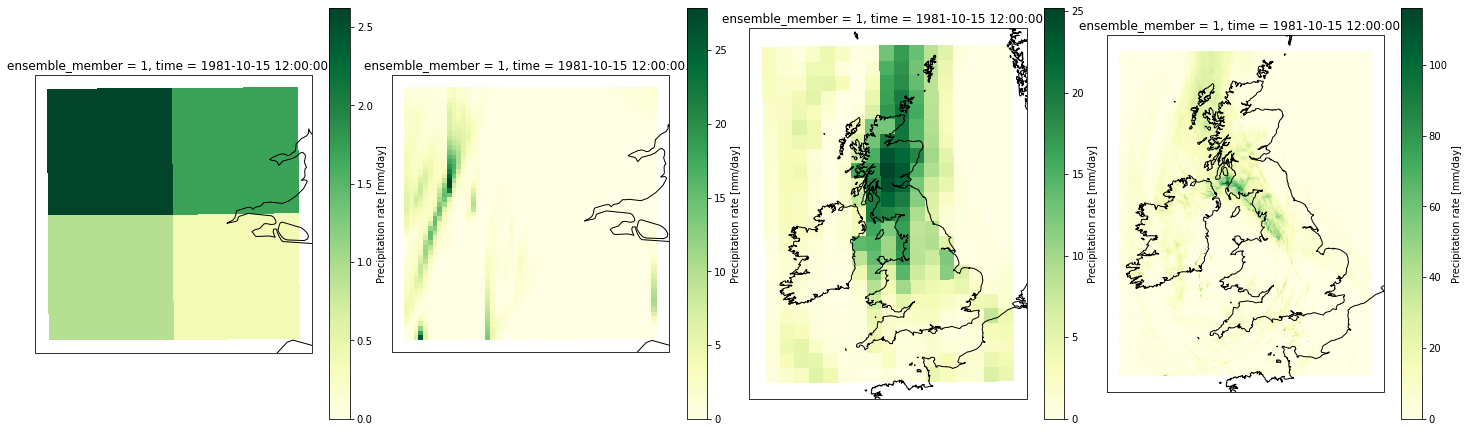

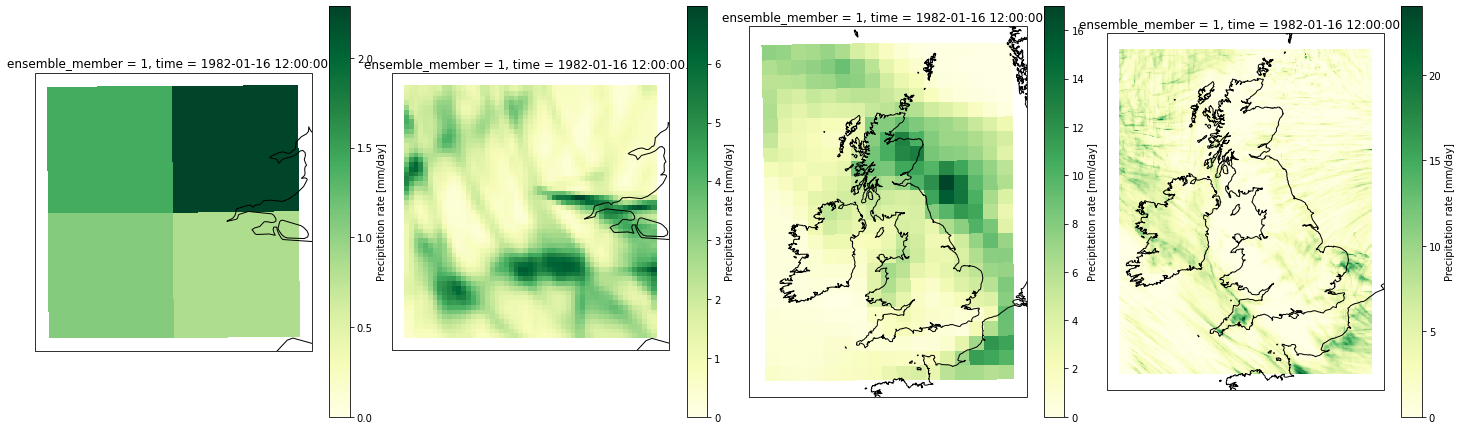

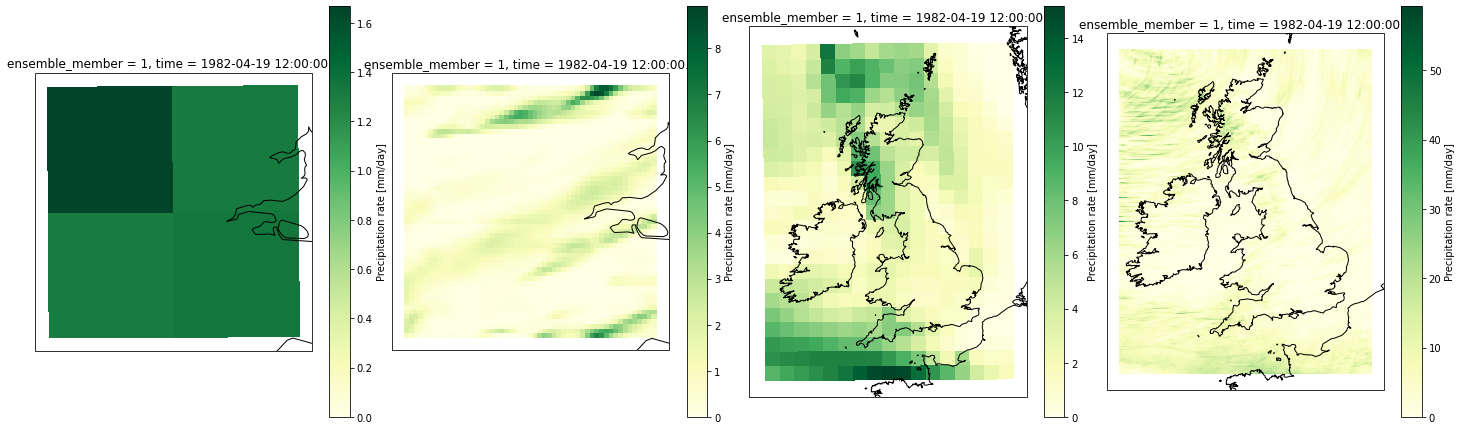

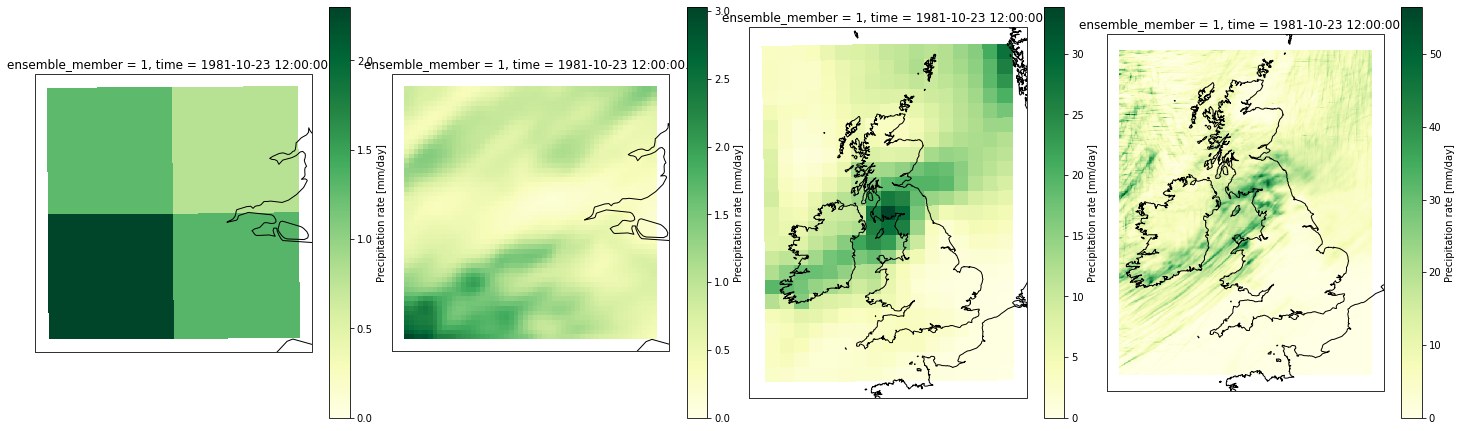

In [11]:
plot_with_ts([london_gcm_data, london_cpm_data, gcm_data, cpm_data], london_median_wet_days, cmap='YlGn')